In [1]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [2]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)['animals'][0]                                               
    except:
        return None

In [3]:
# data_filepath = '../data/json_dump/output_4994.json'
data_filepath = '../src/big_json.json'


data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [4]:
print(data)
#create a pipeline to mash dataframes

# df_temp = spark.read.json(data_filepath, multiLine = True)

PythonRDD[2] at RDD at PythonRDD.scala:53


In [5]:
#remove outer dictionary from every file


In [6]:
df = spark.read.json(data_filepath, multiLine = True)

In [7]:
df.count()

100000

In [8]:
df.show(20)

+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|colors|             contact|         description|distance|        environment|gender|      id|     name|organization_animal_id|organization_id|photos|primary_photo_cropped|        published_at|  size|species|   status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+-

In [9]:
df.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- organization: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- type: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- age: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- declawed: string (nullable = true)
 |    |-- house_trained: boolean (nullable = true)
 |    |-- shots_current: boolean (nullable = true)
 |    |-- spayed_neutered: boolean (nullable = true)
 |    |-- special_needs: boolean (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- coat: string (nullable = true)
 |-- colors: struct (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: strin

In [10]:
df.show(10)

+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|colors|             contact|         description|distance|        environment|gender|      id|     name|organization_animal_id|organization_id|photos|primary_photo_cropped|        published_at|  size|species|   status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+------+--------------------+--------------------+--------+-------------------+------+--------+---------+----------------------+---------------+------+---------------------+--------------------+------+-------+---------+-

In [11]:
df_age_gender = df.select('age', 'gender')

In [12]:
df_age_gender.count()

100000

In [13]:
df_clean_age_gender = df_age_gender.na.drop()

In [14]:
df_clean_age_gender.count()

100000

In [15]:
df_clean_age_gender.show()

+-----+------+
|  age|gender|
+-----+------+
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|Female|
|Adult|Female|
|Adult|Female|
|Young|Female|
| Baby|Female|
| Baby|Female|
| Baby|Female|
| Baby|  Male|
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Young|Female|
|Adult|Female|
| Baby|Female|
|Young|  Male|
+-----+------+
only showing top 20 rows



In [16]:
df_clean_age_gender.printSchema()

root
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)



In [17]:
# df_clean_age_gender.withColumn('gender', explode('gender'))

NameError: name 'explode' is not defined

In [18]:
# dropped_df.createOrReplaceTempView("dog_data")
df_clean_age_gender.createOrReplaceTempView("age_gender_data")

In [19]:
df_clean_age_gender.show(20)

+-----+------+
|  age|gender|
+-----+------+
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|Female|
|Adult|Female|
|Adult|Female|
|Young|Female|
| Baby|Female|
| Baby|Female|
| Baby|Female|
| Baby|  Male|
|Young|Female|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Adult|  Male|
|Young|Female|
|Adult|Female|
| Baby|Female|
|Young|  Male|
+-----+------+
only showing top 20 rows



In [20]:
result = spark.sql('''SELECT gender, 
COUNT(*) AS Count
                        FROM age_gender_data
                        GROUP BY gender
                        ORDER BY COUNT(*) desc''')
result.show()

+------+-----+
|gender|Count|
+------+-----+
|Female|62378|
|  Male|37622|
+------+-----+



In [56]:
total_dogs = 62378 + 37622

In [21]:
plot_age_gender = result.toPandas()
plot_age_gender['gender']
plot_age_gender.dropna(inplace=True)

In [24]:
df = df_clean_age_gender.toPandas()

In [41]:
def is_female(val):
    if val == 'Female':
        return 1
    else:
        return 0
    

def is_male(val):
    if val == 'Male':
        return 1
    else:
        return 0

In [42]:
df['Female']=df['gender'].apply(is_female)  #apply function to column
df['Male']=df['gender'].apply(is_male)

In [43]:
df.head(20)

,age,gender,Female,Male
0,Young,Female,1,0
1,Adult,Male,0,1
2,Adult,Male,0,1
3,Adult,Female,1,0
4,Adult,Female,1,0
5,Adult,Female,1,0
6,Young,Female,1,0
7,Baby,Female,1,0
8,Baby,Female,1,0
9,Baby,Female,1,0


In [33]:
a = df['Female'].values

In [46]:
b = df['Male'].values

In [47]:
b

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_age_gender['gender'], height=plot_age_gender['Count'], color=['pink', 'blue'])
ax.set_title("Raw Count of All Male Vs. Female Dogs In Shelters", fontsize=18)

ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('Number of Dogs', fontsize=16)
plt.tight_layout()
plt.show();
plt.savefig('../src/readme/raw_counts');

In [ ]:
# 2 sample t test- arrive younger male vs female

In [48]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')

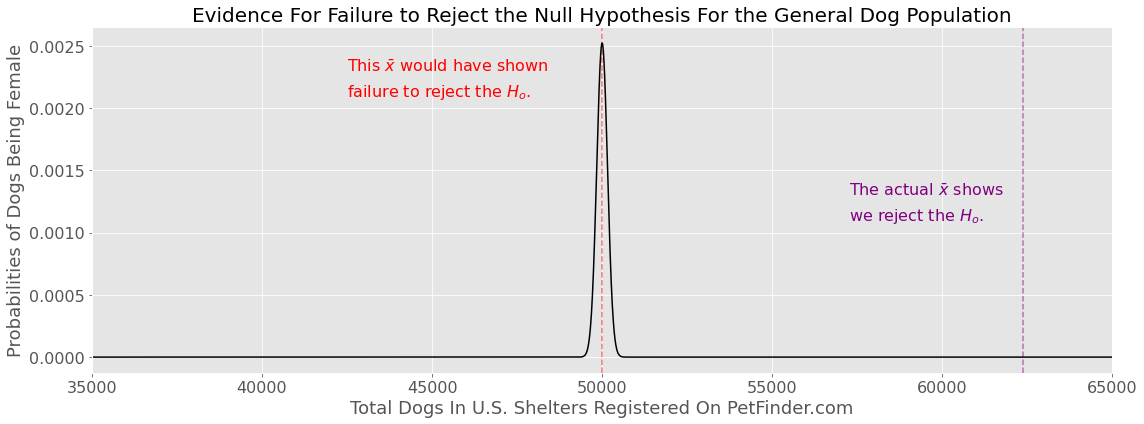

<Figure size 432x288 with 0 Axes>

In [117]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
binomial = stats.binom(n=len(a), p=0.5)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.close('all')


fig, ax = plt.subplots(1, figsize=(16, 6))
# _ = ax.set(xlabel='Total Dogs In U.S. Shelters Registered On PetFinder.com', ylabel='Probabilities of Dogs Being Female');
ax.axvline(x=50000, ymin=0.0, ymax=1, color="red", linestyle='--', alpha=0.5)
ax.axvline(x=62378, ymin=0.0, ymax=1, color="purple", linestyle='--', alpha=0.5)


ax.text(42500, 0.0023, r"This $\bar{x}$ would have shown ", fontsize=16, color='r')
ax.text(42500, 0.0021, r"failure to reject the ${H_o}$.", fontsize=16, color='r')

ax.text(57250, 0.0013, r"The actual $\bar{x}$ shows", fontsize=16, color='purple')
ax.text(57250, 0.0011, r"we reject the ${H_o}$.", fontsize=16, color='purple')

fem_arr= range(len(a))
_ = ax.plot(fem_arr, [binomial.pmf(i) for i in fem_arr], color="black")
ax.set_xlim([35000,65000]);

ax.set_xlabel('Total Dogs In U.S. Shelters Registered On PetFinder.com', fontsize=18)
ax.set_ylabel('Probabilities of Dogs Being Female', fontsize=18)
ax.set_title("Evidence For Failure to Reject the Null Hypothesis For the General Dog Population", fontsize=20)

plt.tight_layout()
plt.show();
plt.savefig('../src/readme/reject_null_hyp');

In [ ]:
# set_linspace = np.linspace(1000)
# #check np.arange()

# were it true that I could accept my null hypothesis, i
# i would see the red dotted line overlapping with the black dotted line

# draw a red line at the number of girls
# this plain grey plot is my null hypothesis

# Female= 62378
# Male = 37622

In [ ]:
#make a normal distribution centered around mean of te data
# calculate std deviation based off clt
# std dev sample/ sq root num of samples
# number males / number of females == 1
# 1 - (number of females / total number of dogs) should equal 50% will be greater than or less than 0.5

In [119]:
# of 10 dogs
# 4 males, 6 females
# prob of females is .6


# do another round, til n times

# add al the means up and divide by the number of times i did that





In [118]:
# to create multiple means for calculating stuff
# norm = stats.norm(the equtin for std deviation)
# norm.rvs(some number i want)